In [39]:
data = data.map(lambda x,y:(x/255,y))   #Burada veriler kullanıma daha uygun olacak şekilde yeniden boyutlandırılıyor.
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [40]:
batch[0].max() #Burada kontrol amaçlı yeni boyutlandırmada bulunan en yüksek değer yazdırılıyor.

1.0

In [49]:
train_size = int(len(data)* .10) + 1  #Burada veriler train,test ve validation olarak 3 gruba ayrıldığında sahip olacakları büyüklükler belirleniyor.
test_size = int(len(data)*0.1)
val_size = int(len(data)*0.2)

train_size + test_size + val_size

121

In [50]:
train = data.take(train_size) #Burada gruplara yukarıdan belirlenmiş boyutlarına uygun olacak şekilde veriler dağıtılıyor.
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [51]:
from tensorflow.keras.models import Sequential  #Burada tensorflow içinde bulunan ve model oluşturmada kullanılacak classlar import ediliyor.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [52]:
model = Sequential() #Sequential class'ından bir model nesnesi türetiliyor.

In [53]:
model.add(Conv2D(16, (3,3),1,activation="relu", input_shape=(256,256,3))) #giriş katmanı
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),1,activation="relu")) # gizli katmanlar
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten()) #matrislerden vektörlere dönüştürme işlemi için flatten katmanı

model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid")) #çıkış katmanı

#Not: Burada katmanların sahip oldukları filters değerleri başarı durumuna göre denemelerle belirlenmiştir.
#Not: Aktivasyon fonksiyonu olarak yaygın kullanımı ve başarısı nedeniyle relu seçilmiştir.
#Not: Çıktıda 0 ve 1 aralığında bir sonuç alabilmek için sigmoid fonksiyonu kullanılmıştır.

In [54]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy']) #modelin derlenmesi için compile fonksiyonu kullanılır. Optimizer olarak Adam tercih edildi.

In [55]:
model.summary() #Oluşturulan model hakkında bilgiler burada çıktıya yazdırılıyor

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      9280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)      

In [58]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train,epochs=10,validation_data=val,callbacks=[tensorboard_callback]) #Burada modelin eğitimi gerçekleştiriliyor.

Epoch 1/10
31/31 [==============================] - 13s 425ms/step - loss: 0.4350 - accuracy: 0.7903 - val_loss: 0.3690 - val_accuracy: 0.8620
Epoch 2/10
31/31 [==============================] - 9s 289ms/step - loss: 0.4063 - accuracy: 0.8216 - val_loss: 0.3489 - val_accuracy: 0.8609
Epoch 3/10
31/31 [==============================] - 10s 324ms/step - loss: 0.3655 - accuracy: 0.8397 - val_loss: 0.3205 - val_accuracy: 0.8859
Epoch 4/10
31/31 [==============================] - 13s 421ms/step - loss: 0.3106 - accuracy: 0.8518 - val_loss: 0.4649 - val_accuracy: 0.8245
Epoch 5/10
31/31 [==============================] - 10s 312ms/step - loss: 0.3290 - accuracy: 0.8579 - val_loss: 0.3033 - val_accuracy: 0.8734
Epoch 6/10
31/31 [==============================] - 13s 425ms/step - loss: 0.2682 - accuracy: 0.8821 - val_loss: 0.2944 - val_accuracy: 0.8818
Epoch 7/10
31/31 [==============================] - 13s 422ms/step - loss: 0.2490 - accuracy: 0.8962 - val_loss: 0.2912 - val_accuracy: 0.8750


In [59]:
import cv2 #Opencv import ediliyor

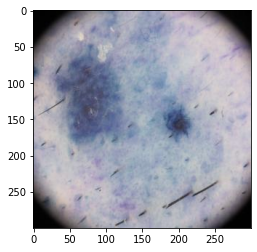

In [61]:
img1 = cv2.imread('/content/gdrive/MyDrive/Dataset/malignant//melanoma_5000.jpg') #Burada verisetinden örnek bir veri kullanılıyor
plt.imshow(img1)
plt.show()

In [62]:
resize = tf.image.resize(img1,(256,256)) #yukarıdaki resim yeniden boyutlandırılıp uygun bir hale getiriliyor.
resize.shape

TensorShape([256, 256, 3])

In [63]:
yhat = model.predict(np.expand_dims(resize/255,0)) #Burada yukarıdaki resim hakkında bir tahmin sonucu dönüyor.
print("%.17f" %yhat)

1/1 [==============================] - 1s 511ms/step
1.00000000000000000


In [64]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [65]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [66]:
res = []
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = new_model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)
  res.append(tf.math.confusion_matrix(y.round(),yhat))

NameError: ignored

In [ ]:
print(pre.result().numpy())
print(sum(res))

In [67]:
from tensorflow.keras.models import load_model

In [68]:
model.save(os.path.join("models","imgclass.h5"))